In [191]:
import numpy as np
import sympy as sym
import math
import matplotlib.pyplot as plt

-psi - atan(w/44 - 1.125)

[-3.97829072e-05 -6.96842506e-03 -5.70747361e-01  4.83597930e+01]


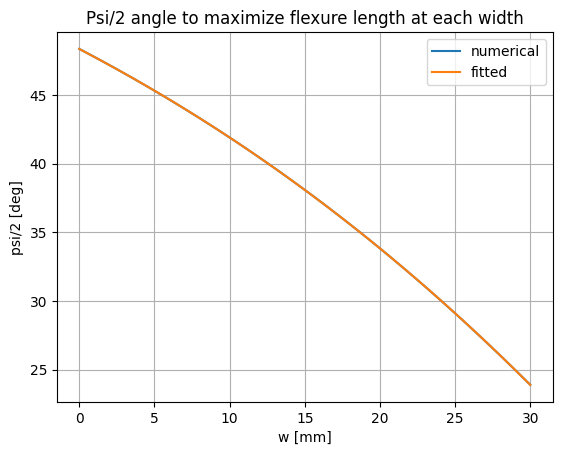

23.9020504110108
23.891651106673066


w*sin(psi) + (3*lmax + 0.2)*cos(psi) - 44

[ 2.09293596e-05  8.50407356e-03 -6.22743211e-01  2.20070940e+01]


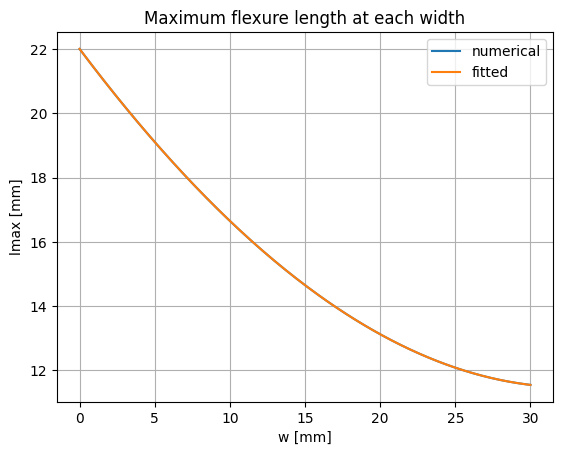

11.5448747570458
11.543556543624264


w*cos(psi)/2 + 0.5

[0.0042749  0.3296092  0.50066792]


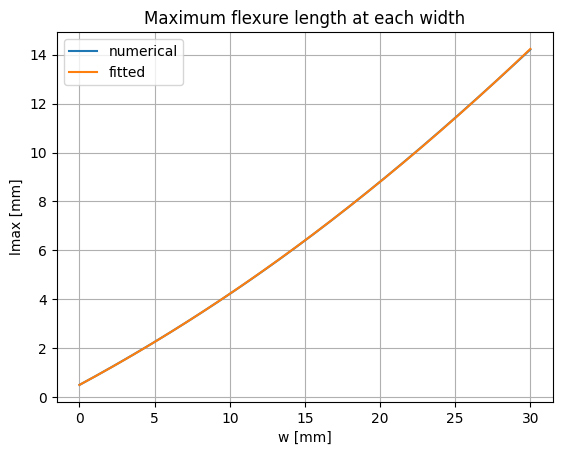

14.2146947151295
14.23635691618911


In [192]:
def func(e,h,psi_order,lmax_order,d_order):
    w, psi, lmax, d = sym.symbols('w psi lmax d')
    
    #eqn = -psi + sym.atan((-50+w/2*sym.cos(psi)+0.5)/(-44-w/2*sym.sin(psi)))
    eqn = -psi + sym.atan((49.5 - w)/44)
    display(eqn)
    psi_inst = []
    w0 = np.linspace(0,30,200)
    for i in w0:
        psi_inst.append(sym.nsolve(eqn.subs(w,i),psi,0.785))
    psi_inst = np.array(psi_inst)
    psi_inst = np.asarray(psi_inst, dtype=float)
    psi_inst = psi_inst*180/np.pi
    poly_coeff = np.polyfit(w0,psi_inst,psi_order)
    test_poly = np.polyval(poly_coeff, w0)
    print(poly_coeff)
    #print(test_poly)
    w0.tofile('w0.csv', sep = ',')
    psi_inst.tofile('psi_inst.csv', sep = ',')
    plt.plot(w0, psi_inst, label='numerical')
    plt.plot(w0, test_poly, label='fitted')
    plt.xlabel('w [mm]')
    plt.ylabel('psi/2 [deg]')
    plt.title('Psi/2 angle to maximize flexure length at each width')
    plt.grid(True)
    plt.legend()
    plt.show()
    wt = 30
    print(sym.nsolve(eqn.subs({w:wt}), psi, 0.725)*180/np.pi)
    print(np.polyval(poly_coeff, wt))
    #print(w0)
    #print(psi_inst)
    
    #height
    height_inst = []
    height_eqn = -h + 21 + w*sym.sin(psi)+(3*lmax + 2*e)*sym.cos(psi)
    display(height_eqn)
    for i in w0:
        psi_inter = np.polyval(poly_coeff, i)*np.pi/180
        height_inst.append(sym.nsolve(height_eqn.subs({w:i, psi: psi_inter}),lmax,20))
    height_inst = np.array(height_inst)
    height_inst = np.asarray(height_inst, dtype=float)
    poly_coeff_h = np.polyfit(w0,height_inst,lmax_order)
    test_poly_h = np.polyval(poly_coeff_h, w0)
    print(poly_coeff_h)
    height_inst.tofile('height_inst.csv', sep = ',')
    plt.plot(w0, height_inst, label = 'numerical')
    plt.plot(w0, test_poly_h, label='fitted')
    plt.xlabel('w [mm]')
    plt.ylabel('lmax [mm]')
    plt.title('Maximum flexure length at each width')
    plt.grid(True)
    plt.legend()
    plt.show()
    #print(w0)
    #print(height_inst)
    print(sym.nsolve(height_eqn.subs({w:wt, psi:np.polyval(poly_coeff,wt)*np.pi/180}), lmax,20))
    print(np.polyval(poly_coeff_h, wt))
    
    #d
    d_inst = []
    d_eqn = w/2*sym.cos(psi)+0.5
    display(d_eqn)
    for i in w0:
        psi_inter = np.polyval(poly_coeff, i)*np.pi/180
        d_inst.append(d_eqn.subs({w:i, psi: psi_inter}))
    d_inst = np.array(d_inst)
    d_inst = np.asarray(d_inst, dtype=float)
    poly_coeff_d = np.polyfit(w0,d_inst,d_order)
    test_poly_d = np.polyval(poly_coeff_d, w0)
    print(poly_coeff_d)
    d_inst.tofile('d_inst.csv', sep = ',')
    plt.plot(w0, d_inst, label = 'numerical')
    plt.plot(w0, test_poly_d, label='fitted')
    plt.xlabel('w [mm]')
    plt.ylabel('lmax [mm]')
    plt.title('Maximum flexure length at each width')
    plt.grid(True)
    plt.legend()
    plt.show()
    #print(w0)
    #print(d_inst)
    wt = 30
    print(d_eqn.subs({w:wt, psi: np.polyval(poly_coeff, wt)*np.pi/180}))
    print(np.polyval(poly_coeff_d, wt))
    
func(e = 0.1, h = 65, psi_order = 3, lmax_order = 3, d_order = 2)